In [2]:
!pip install matplotlib seaborn pandas numpy


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: C:\Users\dbahe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN         

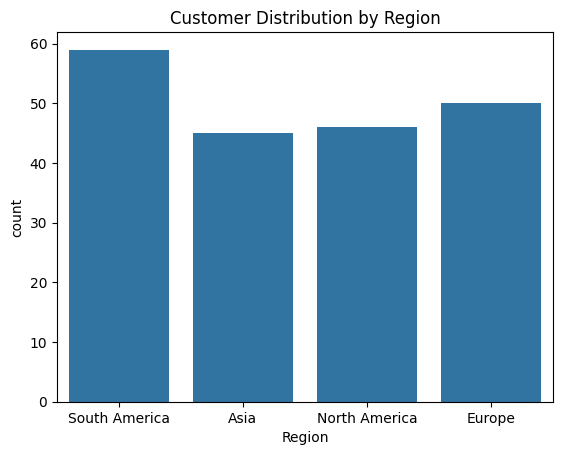

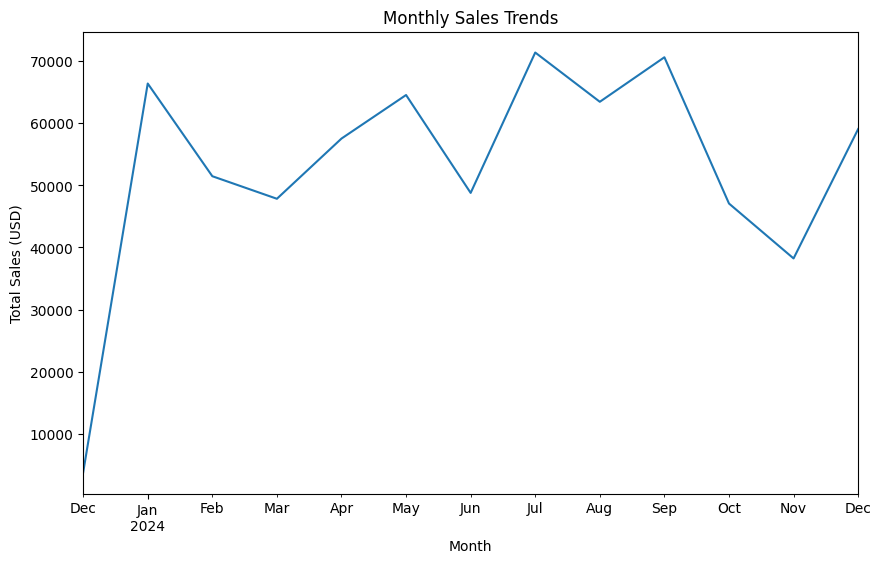

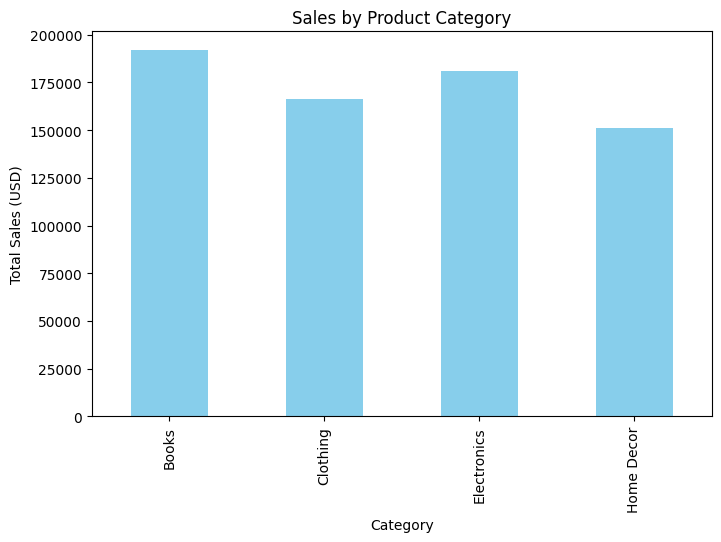

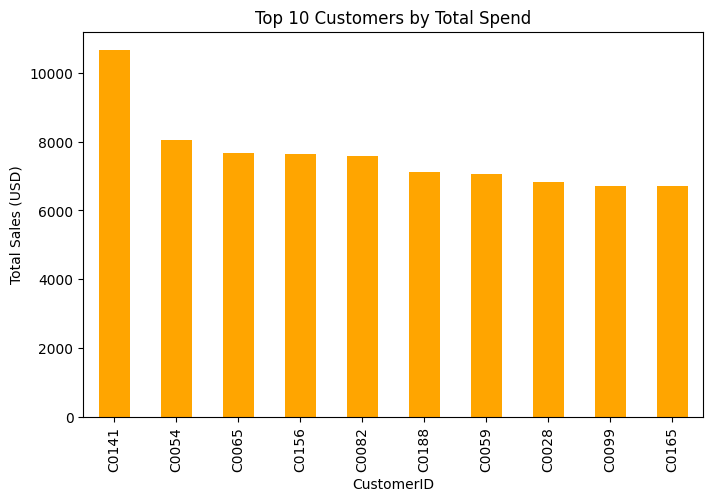

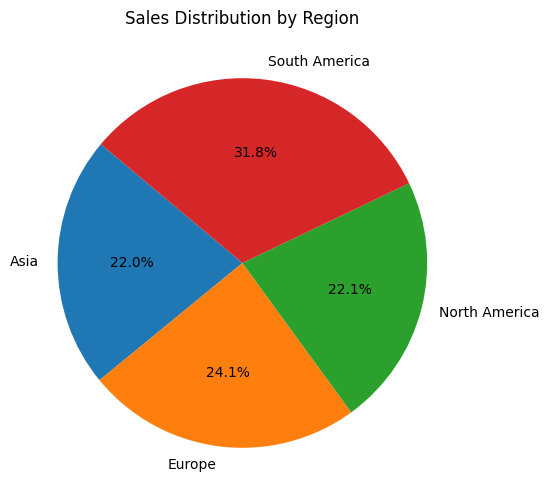

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

print(customers.describe(include="all"))
print(products.describe(include="all"))
print(transactions.describe())

merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

sales_by_region = merged_data.groupby('Region')['TotalValue'].sum()
sales_by_category = merged_data.groupby('Category')['TotalValue'].sum()
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

sns.countplot(x='Region', data=customers)
plt.title("Customer Distribution by Region")
plt.show()

monthly_sales.plot(kind='line', figsize=(10, 6))
plt.title("Monthly Sales Trends")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Month")
plt.show()

sales_by_category.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title("Sales by Product Category")
plt.ylabel("Total Sales (USD)")
plt.show()

top_customers.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title("Top 10 Customers by Total Spend")
plt.ylabel("Total Sales (USD)")
plt.show()

sales_by_region.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6, 6))
plt.title("Sales Distribution by Region")
plt.ylabel("")
plt.show()

merged_data.to_csv("Merged_Data.csv", index=False)


More Visual Insights and PDF Generation

In [4]:
!pip install plotly fpdf scipy kaleido


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: C:\Users\dbahe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: C:\Users\dbahe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import plotly.express as px
import plotly.io as pio
from fpdf import FPDF
from scipy.stats import f_oneway, pearsonr

def generate_insights(merged_data):
    insights = []
    
    sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
    insights.append(f"Regional Sales Distribution:\n{sales_by_region.to_string()}")
    
    top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
    insights.append(f"Top 5 Products by Revenue:\n{top_products.to_string()}")
    
    monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
    insights.append(f"Monthly Sales Trends: Peak sales in {monthly_sales.idxmax()} with ${monthly_sales.max():.2f}")
    
    top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5)
    insights.append(f"Top 5 Customers by Spending:\n{top_customers.to_string()}")
    
    sales_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
    insights.append(f"Category-wise Sales Distribution:\n{sales_by_category.to_string()}")
    
    return insights, sales_by_region, top_products, monthly_sales, sales_by_category

insights, sales_by_region, top_products, monthly_sales, sales_by_category = generate_insights(merged_data)

fig1 = px.pie(sales_by_region, values=sales_by_region.values, names=sales_by_region.index, title="Regional Sales Distribution")
pio.write_image(fig1, "regional_sales.png")

fig2 = px.bar(top_products, x=top_products.index, y=top_products.values, title="Top 5 Products by Revenue", labels={"x": "Product", "y": "Revenue"})
pio.write_image(fig2, "top_products.png")

fig3 = px.line(monthly_sales, x=monthly_sales.index.astype(str), y=monthly_sales.values, title="Monthly Sales Trends", labels={"x": "Month", "y": "Sales (USD)"})
pio.write_image(fig3, "monthly_sales.png")

fig4 = px.bar(sales_by_category, x=sales_by_category.index, y=sales_by_category.values, title="Sales by Category", labels={"x": "Category", "y": "Revenue"})
pio.write_image(fig4, "sales_by_category.png")

class PDFReportWithVisuals(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'EDA and Business Insights Report', align='C', ln=True)
        self.ln(10)

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, ln=True, align='L')
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

    def add_image(self, image_path, width=150):
        self.image(image_path, x=(210 - width) / 2, w=width)
        self.ln(10)

pdf = PDFReportWithVisuals()
pdf.add_page()

pdf.chapter_title("Business Insights")
for i, insight in enumerate(insights, 1):
    pdf.chapter_body(f"{i}. {insight}")

visualization_files = [
    ("Regional Sales Distribution", "regional_sales.png"),
    ("Top 5 Products by Revenue", "top_products.png"),
    ("Monthly Sales Trends", "monthly_sales.png"),
    ("Sales by Category", "sales_by_category.png")
]

for title, file in visualization_files:
    pdf.chapter_title(title)
    pdf.add_image(file)

pdf_path = "Dhruv_Baheti_EDA.pdf"
pdf.output(pdf_path)
print(f"PDF Report with visuals generated: {pdf_path}")